### Import all libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Reading the data

In [3]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.shape

(205, 26)

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning

In [7]:
cars_data.duplicated(subset=['car_ID']).sum()

0

No duplicate records.

In [8]:
cars_data = cars_data.drop(['car_ID'], axis =1)

In [9]:
cars_data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

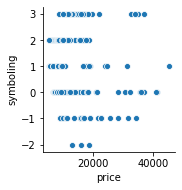

In [11]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)
plt.show()

In [12]:
cars_data['CarName'].value_counts().head(20)

peugeot 504                6
toyota corolla             6
toyota corona              6
subaru dl                  4
mitsubishi g4              3
honda civic                3
mitsubishi mirage g4       3
mitsubishi outlander       3
mazda 626                  3
toyota mark ii             3
isuzu D-Max                2
volvo 145e (sw)            2
volvo 264gl                2
volvo 244dl                2
volkswagen dasher          2
plymouth fury iii          2
honda accord               2
toyota corolla liftback    2
peugeot 604sl              2
volvo 144ea                2
Name: CarName, dtype: int64

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.

In [13]:
cars_data['car_company']=cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [14]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
cars_data = cars_data.drop(['CarName'], axis =1)

In [16]:
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
Nissan          1
toyouta         1
porcshce        1
mercury         1
vokswagen       1
Name: car_company, dtype: int64

In [17]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [18]:
cars_data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

In [19]:
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [20]:
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [22]:
def number_(x):
    return x.map({'four' : 4, 'two' : 2})

cars_data['doornumber']=cars_data[['doornumber']].apply(number_)

In [23]:
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [24]:
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [25]:
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

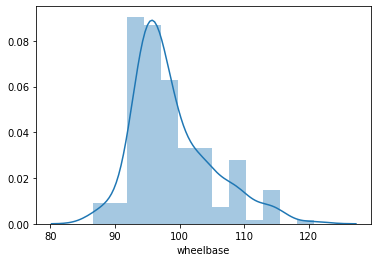

In [28]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [29]:
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

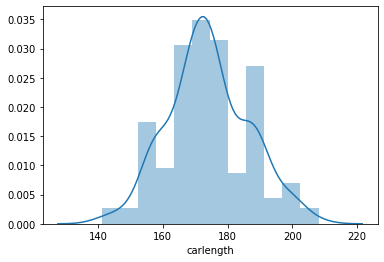

In [30]:
sns.distplot(cars_data['carlength'])
plt.show()

In [31]:
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [32]:
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [33]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [34]:
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [35]:
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.

### Data Visulaization

In [36]:
cars_numeric = cars_data.select_dtypes(include=['int64', 'float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

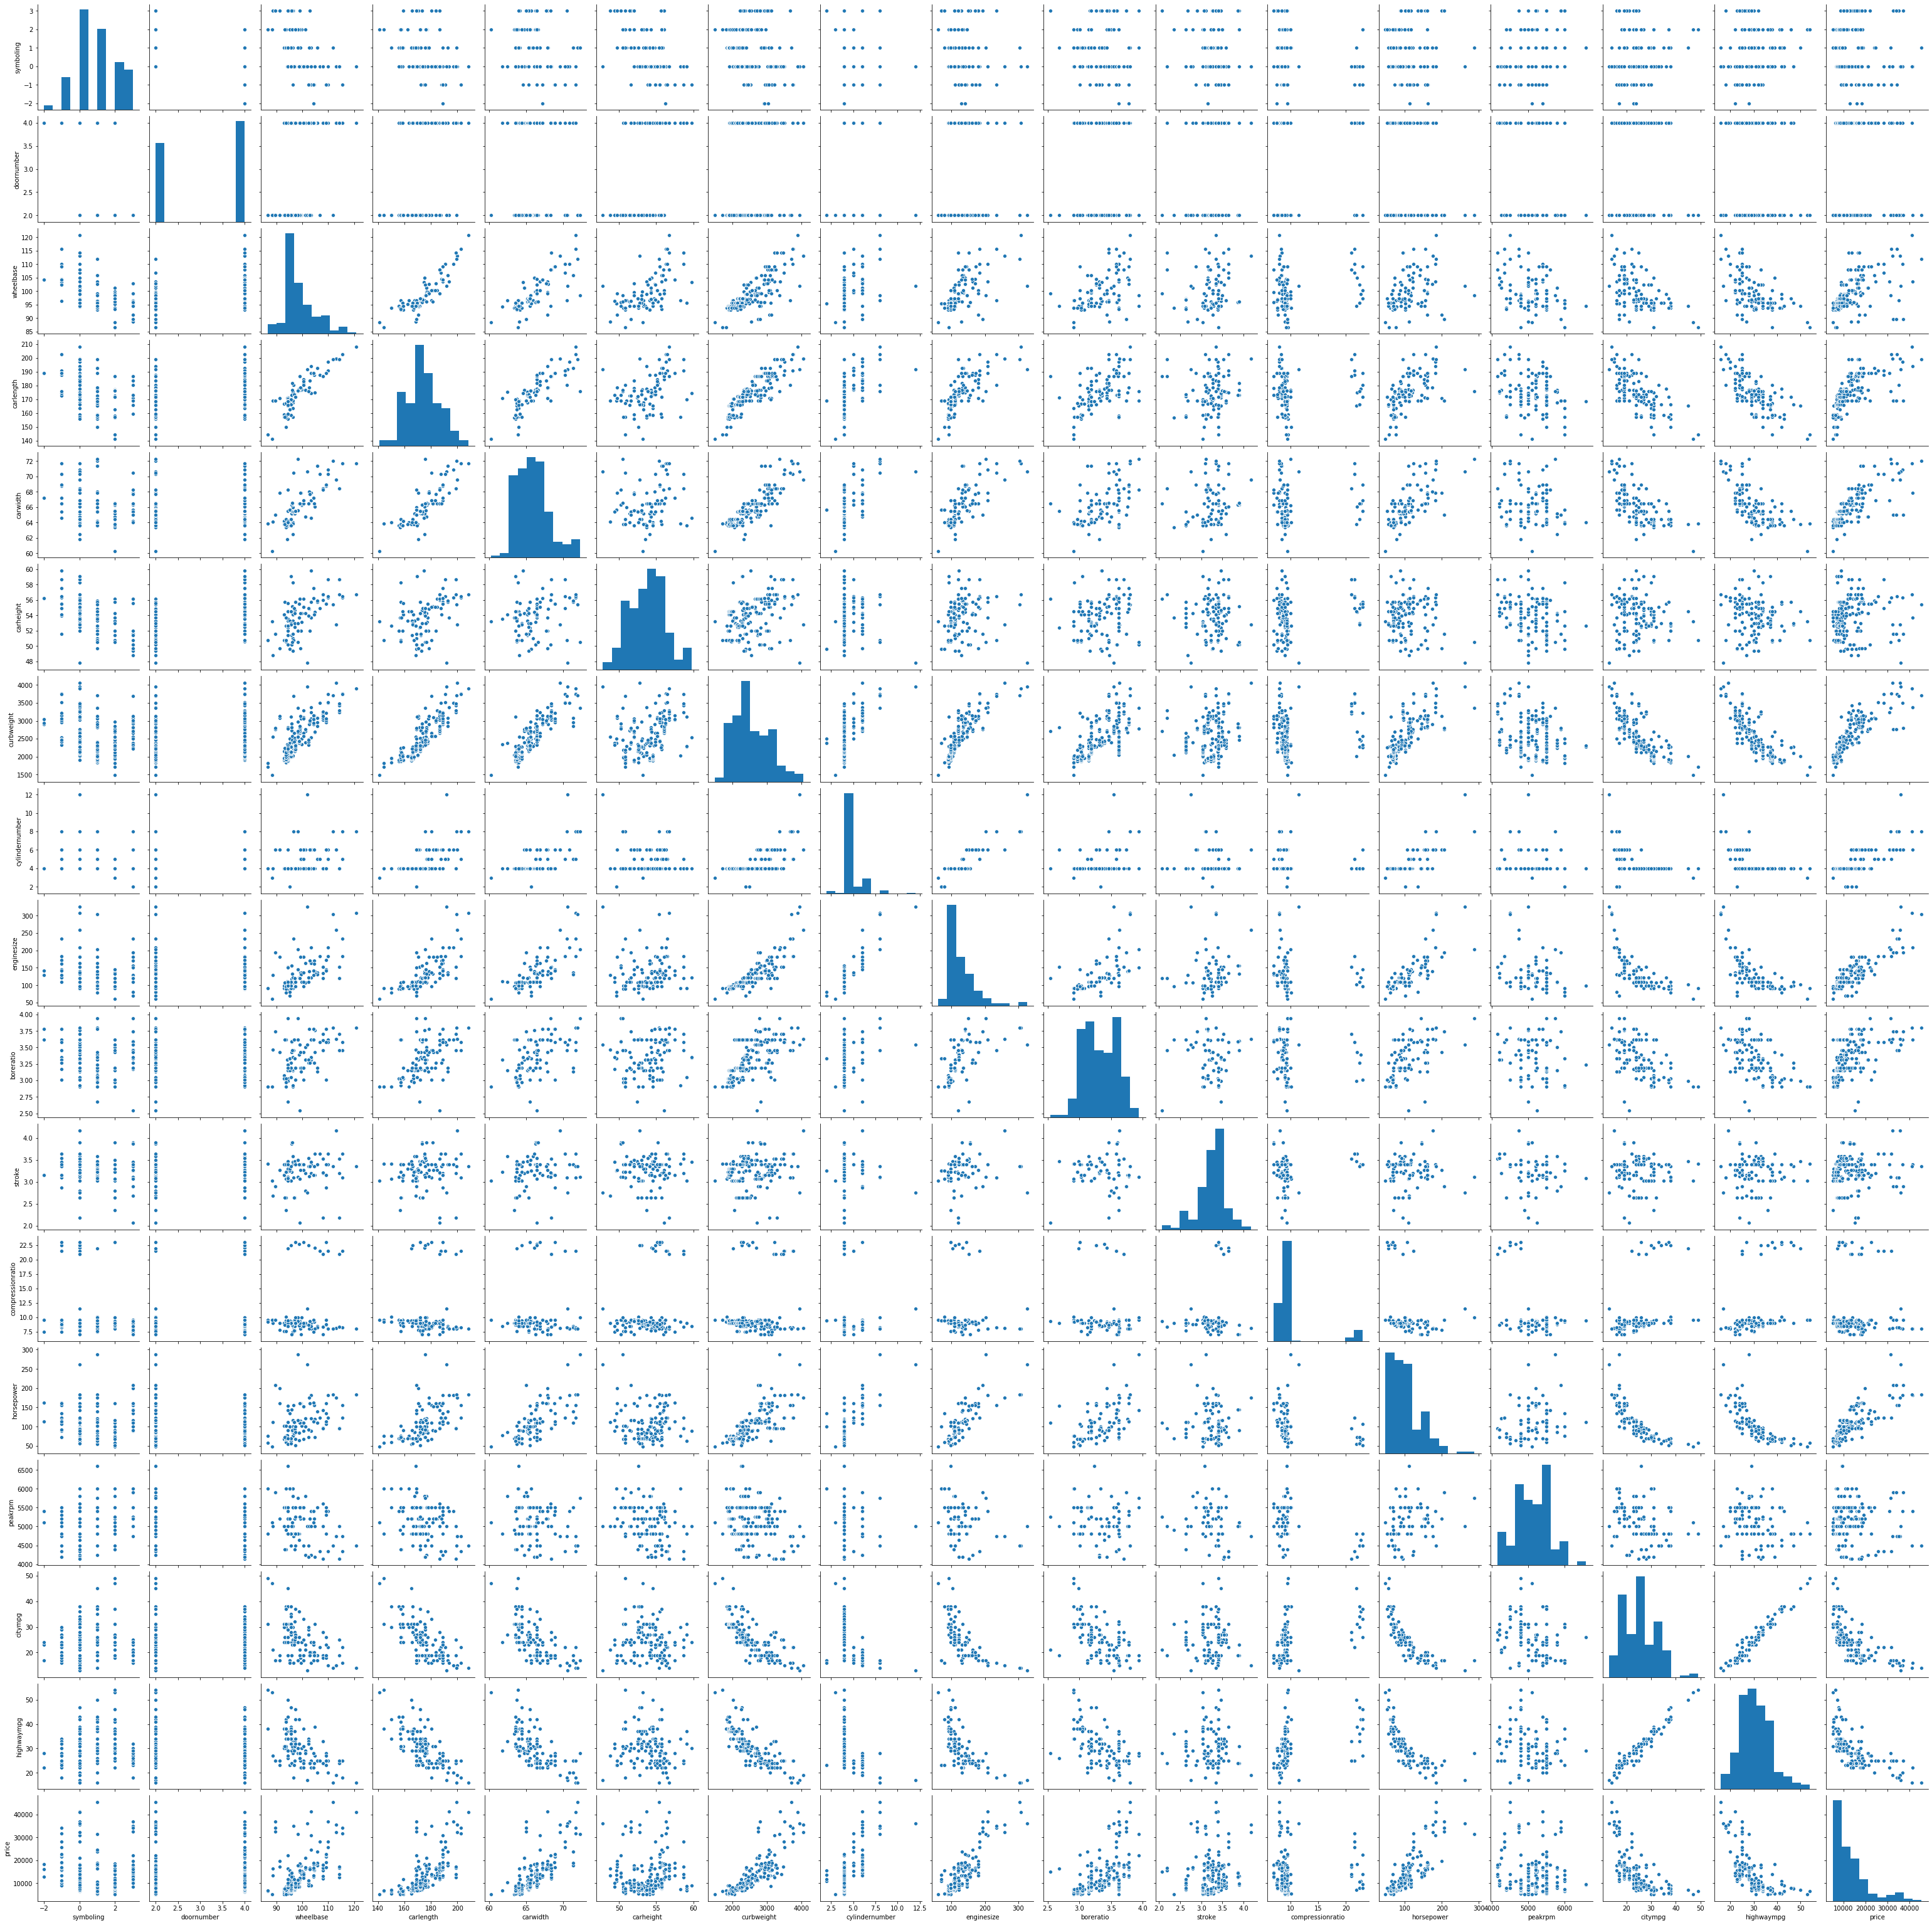

In [37]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

As there are lot of columns- we can't make out really much from above graph. Let us check the correlation.

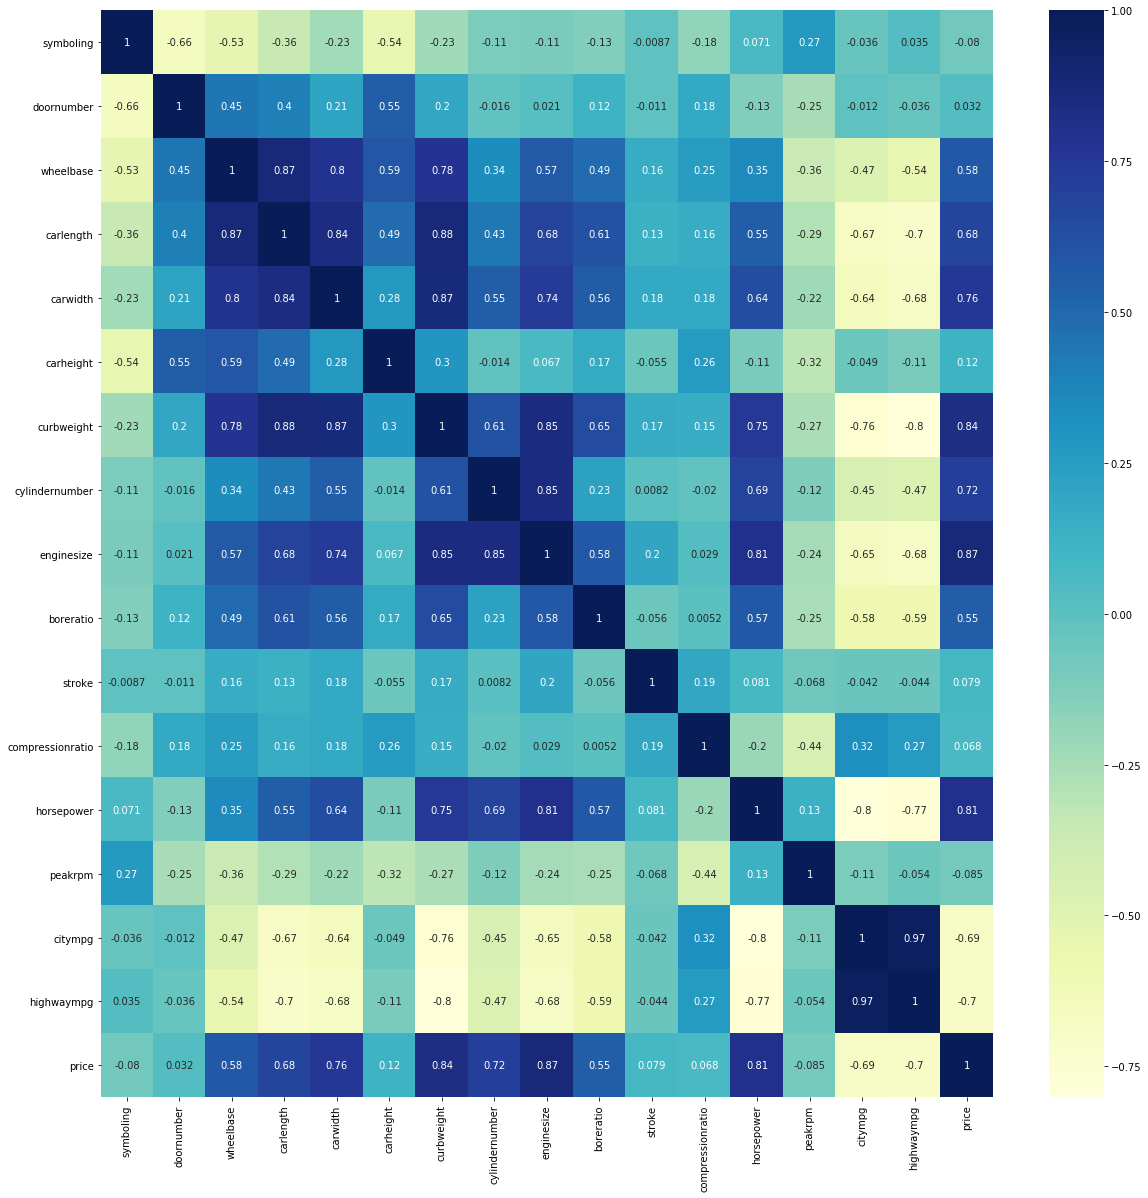

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(cars_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

* Price is negatively correlated to symboling, citympg and highwaympg.

* This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

* There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [39]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


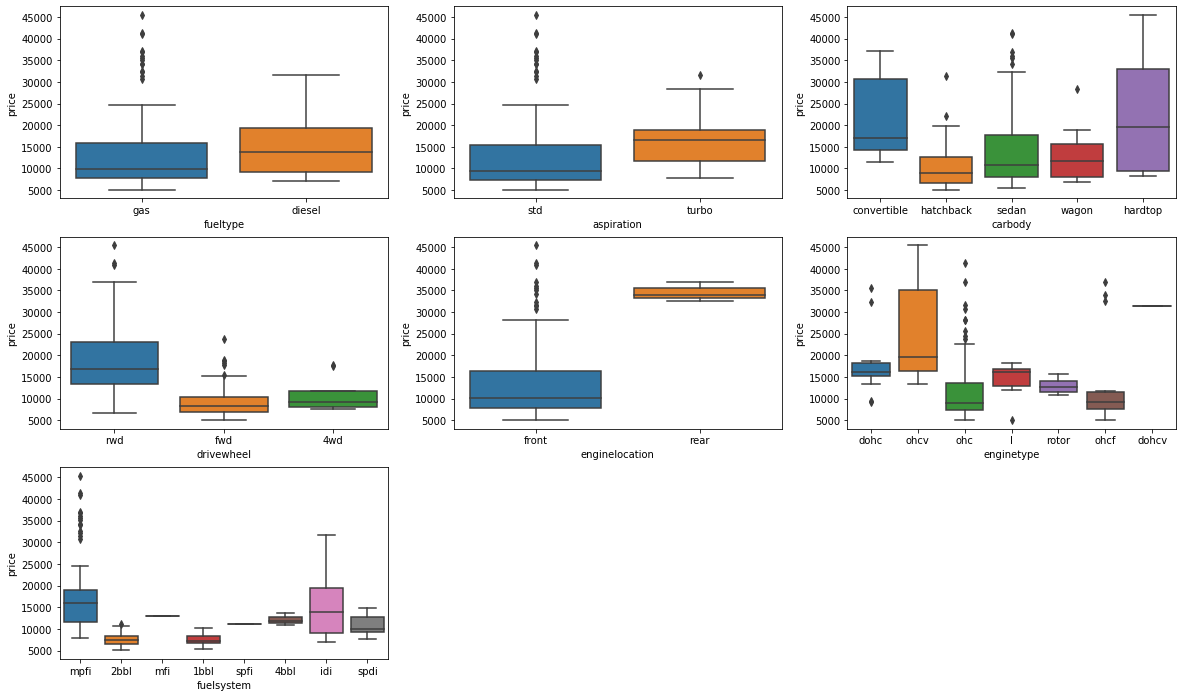

In [40]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)
plt.show()

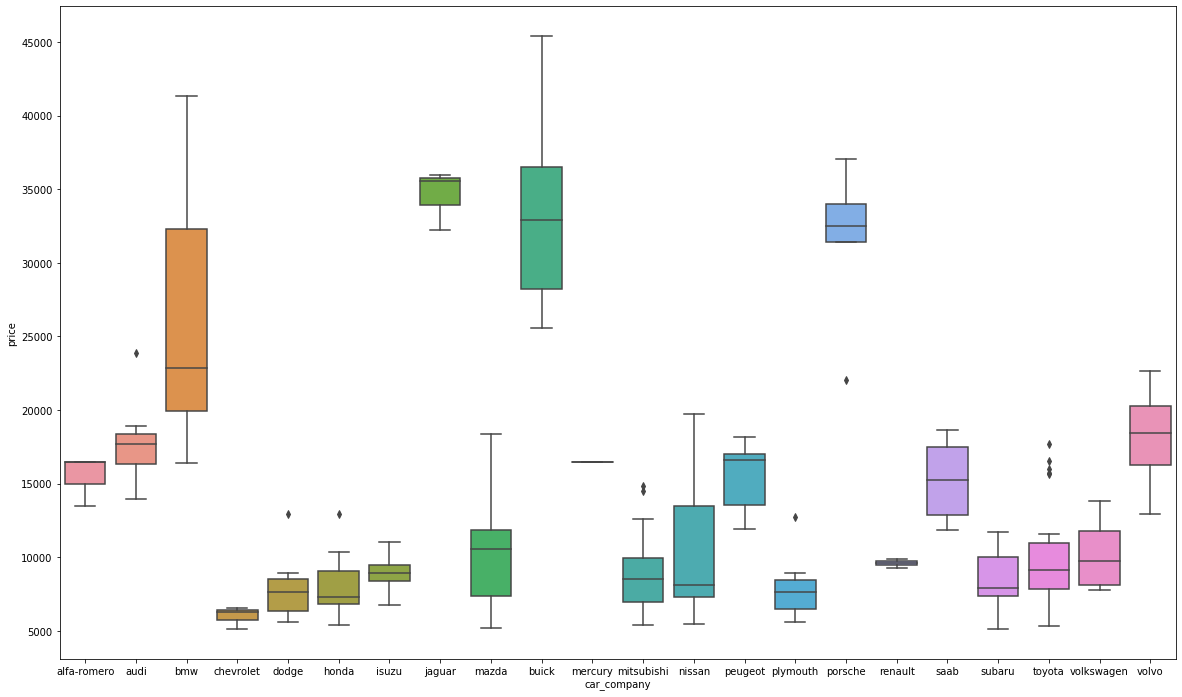

In [41]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)
plt.show()

1. From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
2. Whereas the lower priced cars belong to chevrolet
3. The median price of gas vehicles is lower than that of Diesel Vehicles.
4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles. 
6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. 
9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.
11. Vehicles with OHCV engine type falls under higher price range.

In [42]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
car_df = pd.concat([cars_data, cars_dummies], axis=1)

In [44]:
car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1, inplace=True)

In [45]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

### Scaling the data

In [46]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [47]:
col_list=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

In [48]:
scaler=StandardScaler()

In [49]:
car_df[col_list] = scaler.fit_transform(car_df[col_list])

In [50]:
car_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,0,0,0,0,0,0,0,0,0,0
1,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,0,0,0,0,0,0,0,0,0,0
2,0.133509,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,...,0,0,0,0,0,0,0,0,0,0
3,0.938490,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,...,0,0,0,0,0,0,0,0,0,0
4,0.938490,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,...,0,0,0,0,0,0,0,0,0,0


### Spliting the data into test and train

In [51]:
x = car_df.drop('price', axis=1)
y = car_df['price']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Model building using RFE

In [53]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr, 15)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [54]:
cols = x_train.columns[rfe.support_]
cols

Index(['enginesize', 'compressionratio', 'fueltype_gas', 'enginelocation_rear',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_dodge', 'car_company_mazda', 'car_company_mitsubishi',
       'car_company_nissan', 'car_company_peugeot', 'car_company_renault',
       'car_company_subaru', 'car_company_toyota'],
      dtype='object')

#### Model 1

In [55]:
x1 = x_train[cols]
x1_sm = sm.add_constant(x1)

lr1 = sm.OLS(y_train, x1_sm).fit()

In [56]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     74.66
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.75e-54
Time:                        15:39:09   Log-Likelihood:                -41.057
No. Observations:                 143   AIC:                             112.1
Df Residuals:                     128   BIC:                             156.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

* All the p- values are significant. Let us check VIF.

In [57]:
vif=pd.DataFrame()
vif['features'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,compressionratio,41.73
5,fuelsystem_idi,39.78
2,fueltype_gas,6.15
8,car_company_mazda,1.61
4,enginetype_rotor,1.46
11,car_company_peugeot,1.38
0,enginesize,1.29
9,car_company_mitsubishi,1.27
14,car_company_toyota,1.21
13,car_company_subaru,1.17


We see that there are a few variables which have large VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE.

#### Building model with 10 variables

In [58]:
lr2 = LinearRegression()
rfe2 = RFE(lr2, 10)
rfe2.fit(x_train, y_train)
cols = x_train.columns[rfe2.support_]
cols

Index(['enginesize', 'compressionratio', 'fueltype_gas', 'enginelocation_rear',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mitsubishi', 'car_company_nissan', 'car_company_renault'],
      dtype='object')

#### Model 2

In [59]:
x2 = x_train[cols]
x2_sm = sm.add_constant(x2)

model2 = sm.OLS(y_train, x2_sm).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.33
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.41e-53
Time:                        15:39:09   Log-Likelihood:                -55.870
No. Observations:                 143   AIC:                             131.7
Df Residuals:                     133   BIC:                             161.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [60]:
vif=pd.DataFrame()
vif['features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,compressionratio,36.18
5,fuelsystem_idi,32.47
2,fueltype_gas,4.90
0,enginesize,1.18
7,car_company_mitsubishi,1.14
6,car_company_bmw,1.09
4,enginetype_rotor,1.07
3,enginelocation_rear,1.04
8,car_company_nissan,1.03
9,car_company_renault,1.01


#### Model 3

In [61]:
x3 = x2.drop(['fuelsystem_idi', 'car_company_renault', 'compressionratio'], axis =1)
x3_sm = sm.add_constant(x3)

model3 = sm.OLS(y_train,x3_sm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.23e-53
Time:                        15:39:10   Log-Likelihood:                -61.502
No. Observations:                 143   AIC:                             139.0
Df Residuals:                     135   BIC:                             162.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [62]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,fueltype_gas,1.34
0,enginesize,1.15
4,car_company_bmw,1.13
6,car_company_nissan,1.12
3,enginetype_rotor,1.09
5,car_company_mitsubishi,1.09
2,enginelocation_rear,1.04


#### Model 4

In [63]:
x4 = x3.drop(['car_company_mitsubishi', 'fueltype_gas'], axis =1)
x4_sm = sm.add_constant(x4)

model4 = sm.OLS(y_train,x4_sm).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.7
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           7.37e-53
Time:                        15:39:10   Log-Likelihood:                -68.086
No. Observations:                 143   AIC:                             148.2
Df Residuals:                     137   BIC:                             165.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0364    

In [64]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginesize,1.13
2,enginetype_rotor,1.06
3,car_company_bmw,1.05
1,enginelocation_rear,1.02
4,car_company_nissan,1.00


### Residual analysis

In [65]:
y_train_pred = model4.predict(x4_sm)
y_train_pred.head()

122   -0.624567
125    0.453715
166   -0.624567
1      0.026472
199    0.026472
dtype: float64

In [66]:
Residual = y_train - y_train_pred

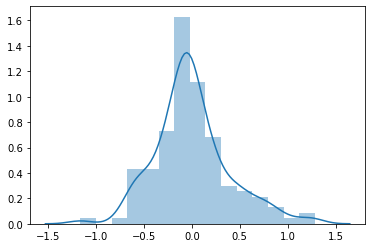

In [67]:
sns.distplot(Residual, bins =15)
plt.show()

Error term is normally distributed.

### Making predictions

In [68]:
final_cols = x4.columns

In [69]:
x_test_model4 = x_test[final_cols]
x_test_model4.head()

,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_nissan
160,-0.695874,0,0,0,0
186,-0.431076,0,0,0,0
59,-0.118132,0,0,0,0
165,-0.695874,0,0,0,0
140,-0.455148,0,0,0,0


In [70]:
x_test_sm = sm.add_constant(x_test_model4)

In [71]:
y_pred = model4.predict(x_test_sm)
y_pred.head()

160   -0.624567
186   -0.400772
59    -0.136288
165   -0.624567
140   -0.421117
dtype: float64

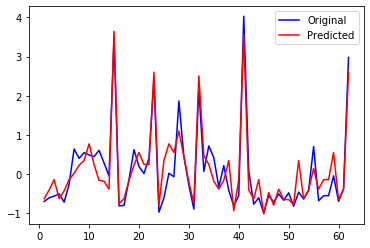

In [72]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test, color='Blue')
plt.plot(c, y_pred, color='Red')
plt.legend(['Original', 'Predicted'])
plt.show()

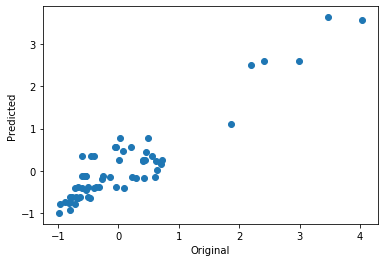

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

The plot is linear. So we can say that the model is doing good.

#### Evaluation

In [74]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8656944271007365

So linear equation for price can be given as: 𝑝𝑟𝑖𝑐𝑒 = -0.0364 + 0.8451\*enginesize + 1.2753\*enginelocation_rear + 1.1112\*enginetype_rotor + 0.8732\*car_company_bmw - 0.2878\*car_company_nissan

#### Which variables are significant in predicting the price of a car?

enginesize\
enginelocation_rear\
enginetype_rotor\
car_company_bmw\
car_company_nissan (-vely)

These are the variables that are significant in predicting the price of a car.